In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.io.parsers.read_csv("insurance.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
pd.DataFrame.duplicated(dataset).value_counts()

False    1337
True        1
Name: count, dtype: int64

In [6]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data requires no further preprocessing except using one-hot encoding of the categorical variables

In [7]:
df=pd.get_dummies(dataset, dtype=int, drop_first=True)

In [8]:
df=df.sample(frac=1)

In [9]:
stop=round(len(df.index)*.85)
Xtrain=df.iloc[:stop]
Xtest=df.iloc[stop+1:]
Ytrain=Xtrain["charges"]
Ytest=Xtest["charges"]
Xtrain=Xtrain.drop("charges", axis=1)
Xtest=Xtest.drop("charges", axis=1)

Now some linear algebra is required, so the dataframes are converted to numpy arrays

In [10]:
x=Xtrain.to_numpy()
y=Ytrain.to_numpy()
xtest=Xtest.to_numpy()
ytest=Ytest.to_numpy()

Using a linear function $y=\boldsymbol x^\top\boldsymbol\theta$, the likelihood is given by
$$
p(\mathcal Y|\mathcal X,\boldsymbol\theta)=p(y_1,...,y_N|\boldsymbol x_1,...,\boldsymbol x_N,\boldsymbol\theta)=\prod_{n=1}^Np(y_n|\boldsymbol x_n,\boldsymbol\theta)
$$
Minimizing the negative 

In [12]:
def parameter(X,Y):
    N,D=X.shape
    kappa=1e-08
    I_n=np.identity(D)
    X_inv=np.linalg.inv(np.matmul(X.T,X)+kappa*I_n) #for numerical stability/invertibility
    return np.matmul(X_inv,np.matmul(X.T,Y)) 

In [13]:
def RMSE(y,pred):
    N=y.shape[0]
    s=sum(np.power(y-pred,2))
    return np.power(s/N,1/2)

In [14]:
theta=parameter(x,y)
pred=np.matmul(xtest,theta)
RMSE(ytest,pred)

np.float64(6347.378384322895)

In [11]:
def phi(X,K):
    return np.concatenate([np.power(X,i) for i in range(K)],axis=1)

In [15]:
rmse=list()
for k in range(1,12):
    theta=parameter(phi(x,k),y)
    pred=np.matmul(phi(xtest,k),theta)
    rmse.append(RMSE(ytest,pred))
minimum=rmse.index(min(rmse))

In [16]:
rmse

[np.float64(12221.646145743327),
 np.float64(6104.246996061038),
 np.float64(6043.2716214159145),
 np.float64(6034.586844682314),
 np.float64(6006.752332810919),
 np.float64(5976.921373972971),
 np.float64(6030.792793131666),
 np.float64(71858.52693707643),
 np.float64(595874.6716822756),
 np.float64(13382058.571890205),
 np.float64(292033.5142208711)]

In [17]:
minimum

5

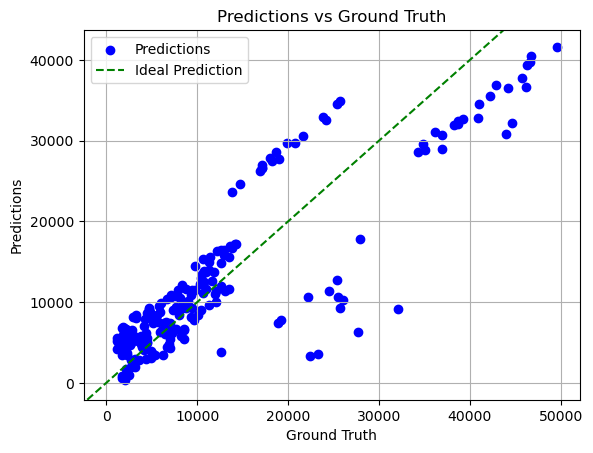

In [18]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(ytest, np.matmul(phi(xtest,minimum),parameter(phi(x,minimum),y)), color="blue", label="Predictions")
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Predictions vs Ground Truth')
plt.axline((0, 0), slope=1, color='green', linestyle='--', label='Ideal Prediction')  
plt.legend()
plt.grid()
plt.show()